## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Salary Data

In [3]:
clean_salary = 'clean_salary.csv'
salary = pd.read_csv(clean_salary, index_col='Unnamed: 0')

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3005
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3006 non-null   int64 
 1   experience_level    3006 non-null   object
 2   employment_type     3006 non-null   object
 3   job_title           3006 non-null   object
 4   salary_in_usd       3006 non-null   int64 
 5   employee_residence  3006 non-null   object
 6   remote_ratio        3006 non-null   int64 
 7   company_location    3006 non-null   object
 8   company_size        3006 non-null   object
dtypes: int64(3), object(6)
memory usage: 234.8+ KB


##### Drop work_year column

In [5]:
salary = salary.drop(columns='work_year')
salary['remote_ratio'] = salary['remote_ratio'].astype('category')
salary['experience_level'] = salary['experience_level'].astype('category')
salary['employment_type'] = salary['employment_type'].astype('category')
salary['company_size'] = salary['company_size'].astype('category')

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3005
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   experience_level    3006 non-null   category
 1   employment_type     3006 non-null   category
 2   job_title           3006 non-null   object  
 3   salary_in_usd       3006 non-null   int64   
 4   employee_residence  3006 non-null   object  
 5   remote_ratio        3006 non-null   category
 6   company_location    3006 non-null   object  
 7   company_size        3006 non-null   category
dtypes: category(4), int64(1), object(3)
memory usage: 129.8+ KB


## Explore Data

In [7]:
salary.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,EN,FT,Data Analyst,75000,US,100,US,M
1,EN,FT,Data Analyst,60000,US,100,US,M
2,MI,FT,Analytics Engineer,185700,US,0,US,M
3,MI,FT,Analytics Engineer,165000,US,0,US,M
4,SE,FT,Data Engineer,160000,US,100,US,M


### Salary in USD

In [8]:
salary.salary_in_usd.describe()

count      3006.000000
mean     134282.715569
std       62764.987716
min        5000.000000
25%       91427.750000
50%      130000.000000
75%      172339.500000
max      450000.000000
Name: salary_in_usd, dtype: float64

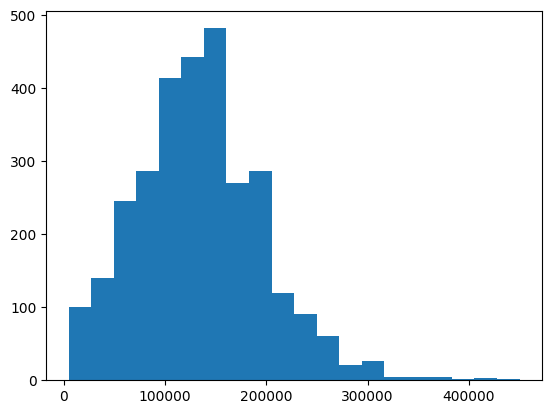

In [9]:
plt.hist(salary.salary_in_usd, bins=20)
plt.show()

### Highest Salaries

In [10]:
salary.sort_values('salary_in_usd', ascending=False).head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2773,MI,FT,Research Scientist,450000,US,0,US,M
1262,MI,FT,Data Analyst,430967,GB,0,GB,M
2998,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
2926,EX,CT,Principal Data Scientist,416000,US,100,US,S
3001,SE,FT,Data Scientist,412000,US,100,US,L


The three highest salaries seem like outliers considering their experience level, but not entirely impossible that the mistake was made on experience level and not salary.

### Lowest Salaries

In [11]:
salary.sort_values('salary_in_usd').head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
54,SE,FT,BI Data Engineer,5000,NG,0,NG,M
1935,MI,FT,NLP Engineer,5132,CZ,100,CZ,M
1829,EN,FT,Power BI Developer,5409,IN,50,IN,L
2788,MI,PT,3D Computer Vision Researcher,5409,IN,50,IN,M
2918,MI,FT,Data Scientist,5679,IN,100,US,S


### Salary by Experience Level

In [12]:
salary.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,256.0,73277.445312,50401.821853,5409.0,31520.0,62146.0,100000.0,250000.0
EX,83.0,196597.361446,70715.354365,69741.0,145000.0,196200.0,239000.0,416000.0
MI,679.0,102429.541973,54208.262774,5132.0,65000.0,98506.0,131276.0,450000.0
SE,1988.0,150416.286217,56336.884623,5000.0,113000.0,144927.0,185025.0,412000.0


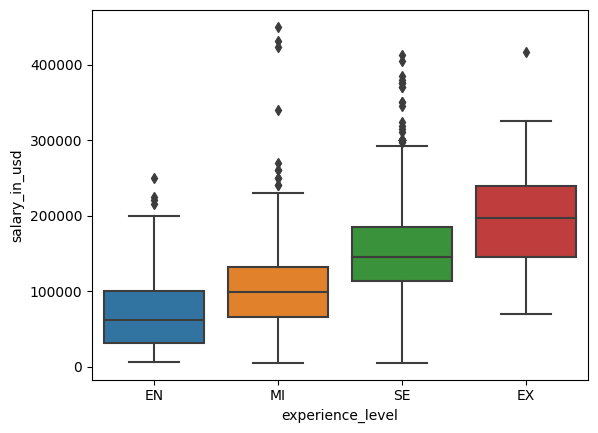

In [13]:
sns.boxplot(data=salary, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])
plt.show()

The high outliers are concerning, but the distributions seem to be intuitively correct.

### Salary by Job Title

In [14]:
salary.groupby('job_title')['salary_in_usd'].describe().head()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,4.0,21352.25000,20046.470685,5409.0,8852.25,15000.0,27500.00,50000.0
AI Developer,4.0,101525.25000,88887.164298,6304.0,50002.00,92284.0,143807.25,215229.0
AI Programmer,1.0,40000.00000,NaN,40000.0,40000.00,40000.0,40000.00,40000.0
AI Scientist,15.0,89214.00000,76661.436648,12000.0,30760.00,50000.0,162500.00,200000.0
Analytics Engineer,73.0,144136.69863,52233.246746,7500.0,110000.00,138750.0,180000.00,250000.0


In [15]:
salary.job_title.value_counts()

Data Engineer                        826
Data Scientist                       667
Data Analyst                         491
Machine Learning Engineer            242
Data Architect                        77
                                    ... 
Deep Learning Researcher               1
Principal Data Architect               1
Staff Data Scientist                   1
Applied Machine Learning Engineer      1
Cloud Data Architect                   1
Name: job_title, Length: 89, dtype: int64

##### Drop Job Title Column

In [16]:
salary = salary.drop(columns='job_title')


There are too many unique values in the Job Title column. Besides, Experience Level should be a more straight-forward measure of skill level, since all jobs are data-related.

### Salary by Company Size

In [17]:
salary.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,392.0,112623.109694,72568.524790,5409.0,57589.50,103995.5,154558.75,423000.0
M,2474.0,140862.930073,58768.836857,5000.0,100000.00,137450.0,175000.00,450000.0
S,140.0,78647.821429,60774.425432,5679.0,40266.75,62883.0,108500.00,416000.0


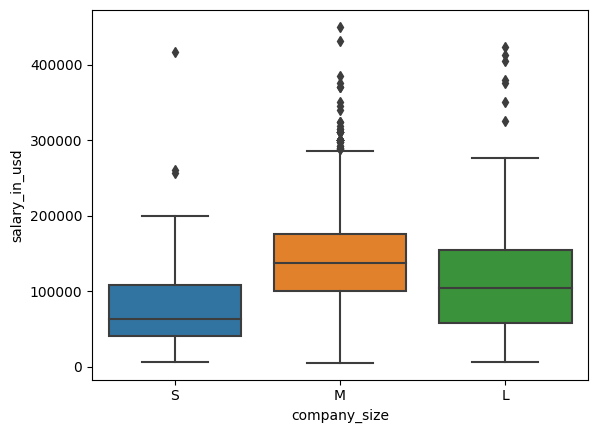

In [18]:
sns.boxplot(data=salary, x='company_size', y='salary_in_usd', order=['S', 'M', 'L'])
plt.show()

### Salary by Employment Type

In [19]:
salary.groupby('employment_type')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,8.0,134871.125000,138431.957030,7500.0,52617.25,95000.0,146250.0,416000.0
FL,9.0,52008.666667,31238.595675,12000.0,30523.00,50000.0,60000.0,100000.0
FT,2972.0,135072.243607,62099.484969,5000.0,93700.00,131300.0,174000.0,450000.0
PT,17.0,39534.588235,38311.613011,5409.0,12000.00,21669.0,52533.0,125404.0


###### Drop Employment Type column

In [20]:
salary = salary.drop(columns='employment_type')
salary.head()

,experience_level,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,EN,75000,US,100,US,M
1,EN,60000,US,100,US,M
2,MI,185700,US,0,US,M
3,MI,165000,US,0,US,M
4,SE,160000,US,100,US,M


There is very little data in categories besides Full Time, so it would be hard to draw any significant conclusions.

### Salary by Remote Ratio

In [21]:
salary.groupby('remote_ratio')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,1440.0,140888.631944,59035.310496,5000.0,102100.0,135000.0,175000.0,450000.0
50,179.0,76454.424581,59315.605833,5409.0,39962.5,63040.0,100000.0,423000.0
100,1387.0,134887.434030,63192.283927,5132.0,90000.0,135000.0,175525.0,416000.0


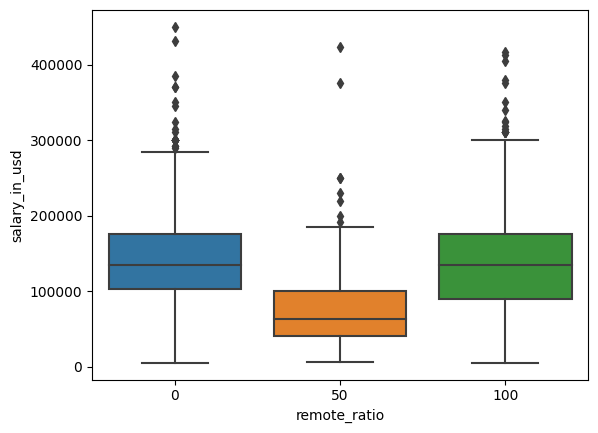

In [22]:
sns.boxplot(data=salary, x='remote_ratio', y='salary_in_usd')
plt.show()

### Company Location & Employee Residence

##### Import Continent Data

In [23]:
cont = pd.read_csv('sovereign_states.csv')
cont = cont.drop(columns=['Name', '#', 'a-3'])
cont.head()

,CC,a-2
0,AS,AF
1,EU,AL
2,AN,AQ
3,AF,DZ
4,OC,AS


##### Merge Data

In [24]:
merged = salary.merge(cont, left_on='company_location', right_on='a-2', how='left')
merged.CC = merged.CC.fillna('NA')
merged = merged.rename(columns={'CC':'company_continent'})
merged = merged.merge(cont, left_on='employee_residence', right_on='a-2', how='left')
merged.CC = merged.CC.fillna('NA')
merged = merged.rename(columns={'CC':'employee_continent'})
salary = merged.drop(columns=['employee_residence', 'company_location', 'a-2_x', 'a-2_y'])
salary.head()

,experience_level,salary_in_usd,remote_ratio,company_size,company_continent,employee_continent
0,EN,75000,100,M,NA,NA
1,EN,60000,100,M,NA,NA
2,MI,185700,0,M,NA,NA
3,MI,165000,0,M,NA,NA
4,SE,160000,100,M,NA,NA


### Salary by Company Continent

In [25]:
salary.groupby('company_continent')['salary_in_usd'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
company_continent,,,,,,,,
NA,2466.0,149205.118816,55920.744731,5679.0,110000.00,142200.0,182425.0,450000.0
EU,419.0,72425.217184,43489.380626,5132.0,47044.50,63831.0,88980.0,430967.0
AS,101.0,43575.603960,47542.729010,5409.0,15000.00,25000.0,56723.0,260000.0
SA,22.0,39913.045455,32213.152615,6270.0,12925.75,32019.0,53000.0,125000.0
OC,17.0,74324.764706,45702.061445,18053.0,42028.00,53368.0,83864.0,171000.0
AF,12.0,45989.333333,57139.720796,5000.0,10000.00,22800.0,57500.0,200000.0


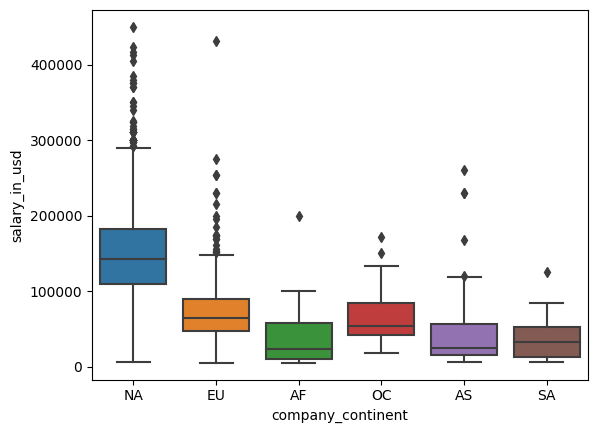

In [26]:
sns.boxplot(data=salary, x='company_continent', y='salary_in_usd')
plt.show()

### Salary by Employee Continent

In [27]:
salary.groupby('employee_continent')['salary_in_usd'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
employee_continent,,,,,,,,
NA,2429.0,150450.241663,55124.614706,10000.0,112900.00,144000.0,183000.00,450000.0
EU,426.0,72215.342723,43594.095542,5132.0,46771.50,63388.5,88654.00,430967.0
AS,124.0,48530.491935,49261.470627,5409.0,16145.25,30475.5,61527.75,260000.0
SA,31.0,49777.000000,38665.797105,6270.0,15953.50,48000.0,76500.00,160000.0
AF,14.0,45167.214286,52741.698943,5000.0,10500.00,26400.0,50000.00,200000.0
OC,13.0,75386.384615,40163.947512,20000.0,45050.00,75050.0,83864.00,150000.0


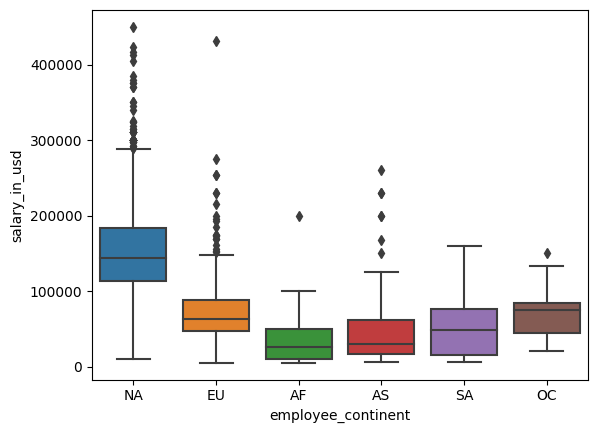

In [28]:
sns.boxplot(data=salary, x='employee_continent', y='salary_in_usd')
plt.show()

##### Company & Employee Continent for Remote Workers

In [29]:
salary[salary['employee_continent']!=salary['company_continent']]['remote_ratio'].value_counts()

100    52
50     17
0      13
Name: remote_ratio, dtype: int64

In [30]:
salary[(salary['employee_continent']!=salary['company_continent']) & (salary['remote_ratio']==0)].head()

,experience_level,salary_in_usd,remote_ratio,company_size,company_continent,employee_continent
226,EX,106000,0,L,EU,AS
739,MI,50000,0,S,AS,EU
740,MI,50000,0,S,EU,AS
1969,MI,10000,0,M,AS,EU
1970,MI,10000,0,M,EU,AS


### Save Data

In [32]:
salary.to_csv('eda_salary.csv')